In [4]:
import numpy as np


In [5]:
import  pandas as pd


In [59]:
data= pd.read_csv('cricket_data.csv')
data.tail()

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
1167,2022,Mayank Markande,2,0,0,0,0,0,0,0,...,2,42,57,1,1/26,57.00,8.14,42.00,0,0
1168,2021,Mayank Markande,1,0,0,0,0.00,0,0.00,0,...,1,18,26,0,0/26,0,8.66,0,0,0
1169,2019,Mayank Markande,3,1,6,6,6.00,5,120.00,0,...,3,36,59,1,1/23,59.00,9.83,36.00,0,0
1170,2018,Mayank Markande,14,4,21,7*,10.50,24,87.50,0,...,14,264,368,15,4/23,24.53,8.36,17.60,1,0
1171,No stats,Jhathavedh Subramanyan,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,...,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats


DATA CLEANING AND PROCESSING

 QUESTION 1 . Identify and handle any missing values in the dataset

In [7]:

data1 = data[data['Year'] != 'No stats']

data1[data1['Year'] == 'No stats']  #Filtered out the names with no stats (null)


,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls


 QUESTION 2 Are there any inconsistencies in the dataset (e.g., mismatched data types, outliers)?

In [8]:
cols_convrt = [
    'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Highest_Score', 'Batting_Average',
    'Balls_Faced', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
    'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded',
    'Wickets_Taken', 'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate',
    'Four_Wicket_Hauls', 'Five_Wicket_Hauls','Year'
]

for col in cols_convrt:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.dtypes


Year                   float64
Player_Name             object
Matches_Batted         float64
Not_Outs               float64
Runs_Scored            float64
Highest_Score          float64
Batting_Average        float64
Balls_Faced            float64
Batting_Strike_Rate    float64
Centuries              float64
Half_Centuries         float64
Fours                  float64
Sixes                  float64
Catches_Taken          float64
Stumpings              float64
Matches_Bowled         float64
Balls_Bowled           float64
Runs_Conceded          float64
Wickets_Taken          float64
Best_Bowling_Match      object
Bowling_Average        float64
Economy_Rate           float64
Bowling_Strike_Rate    float64
Four_Wicket_Hauls      float64
Five_Wicket_Hauls      float64
dtype: object

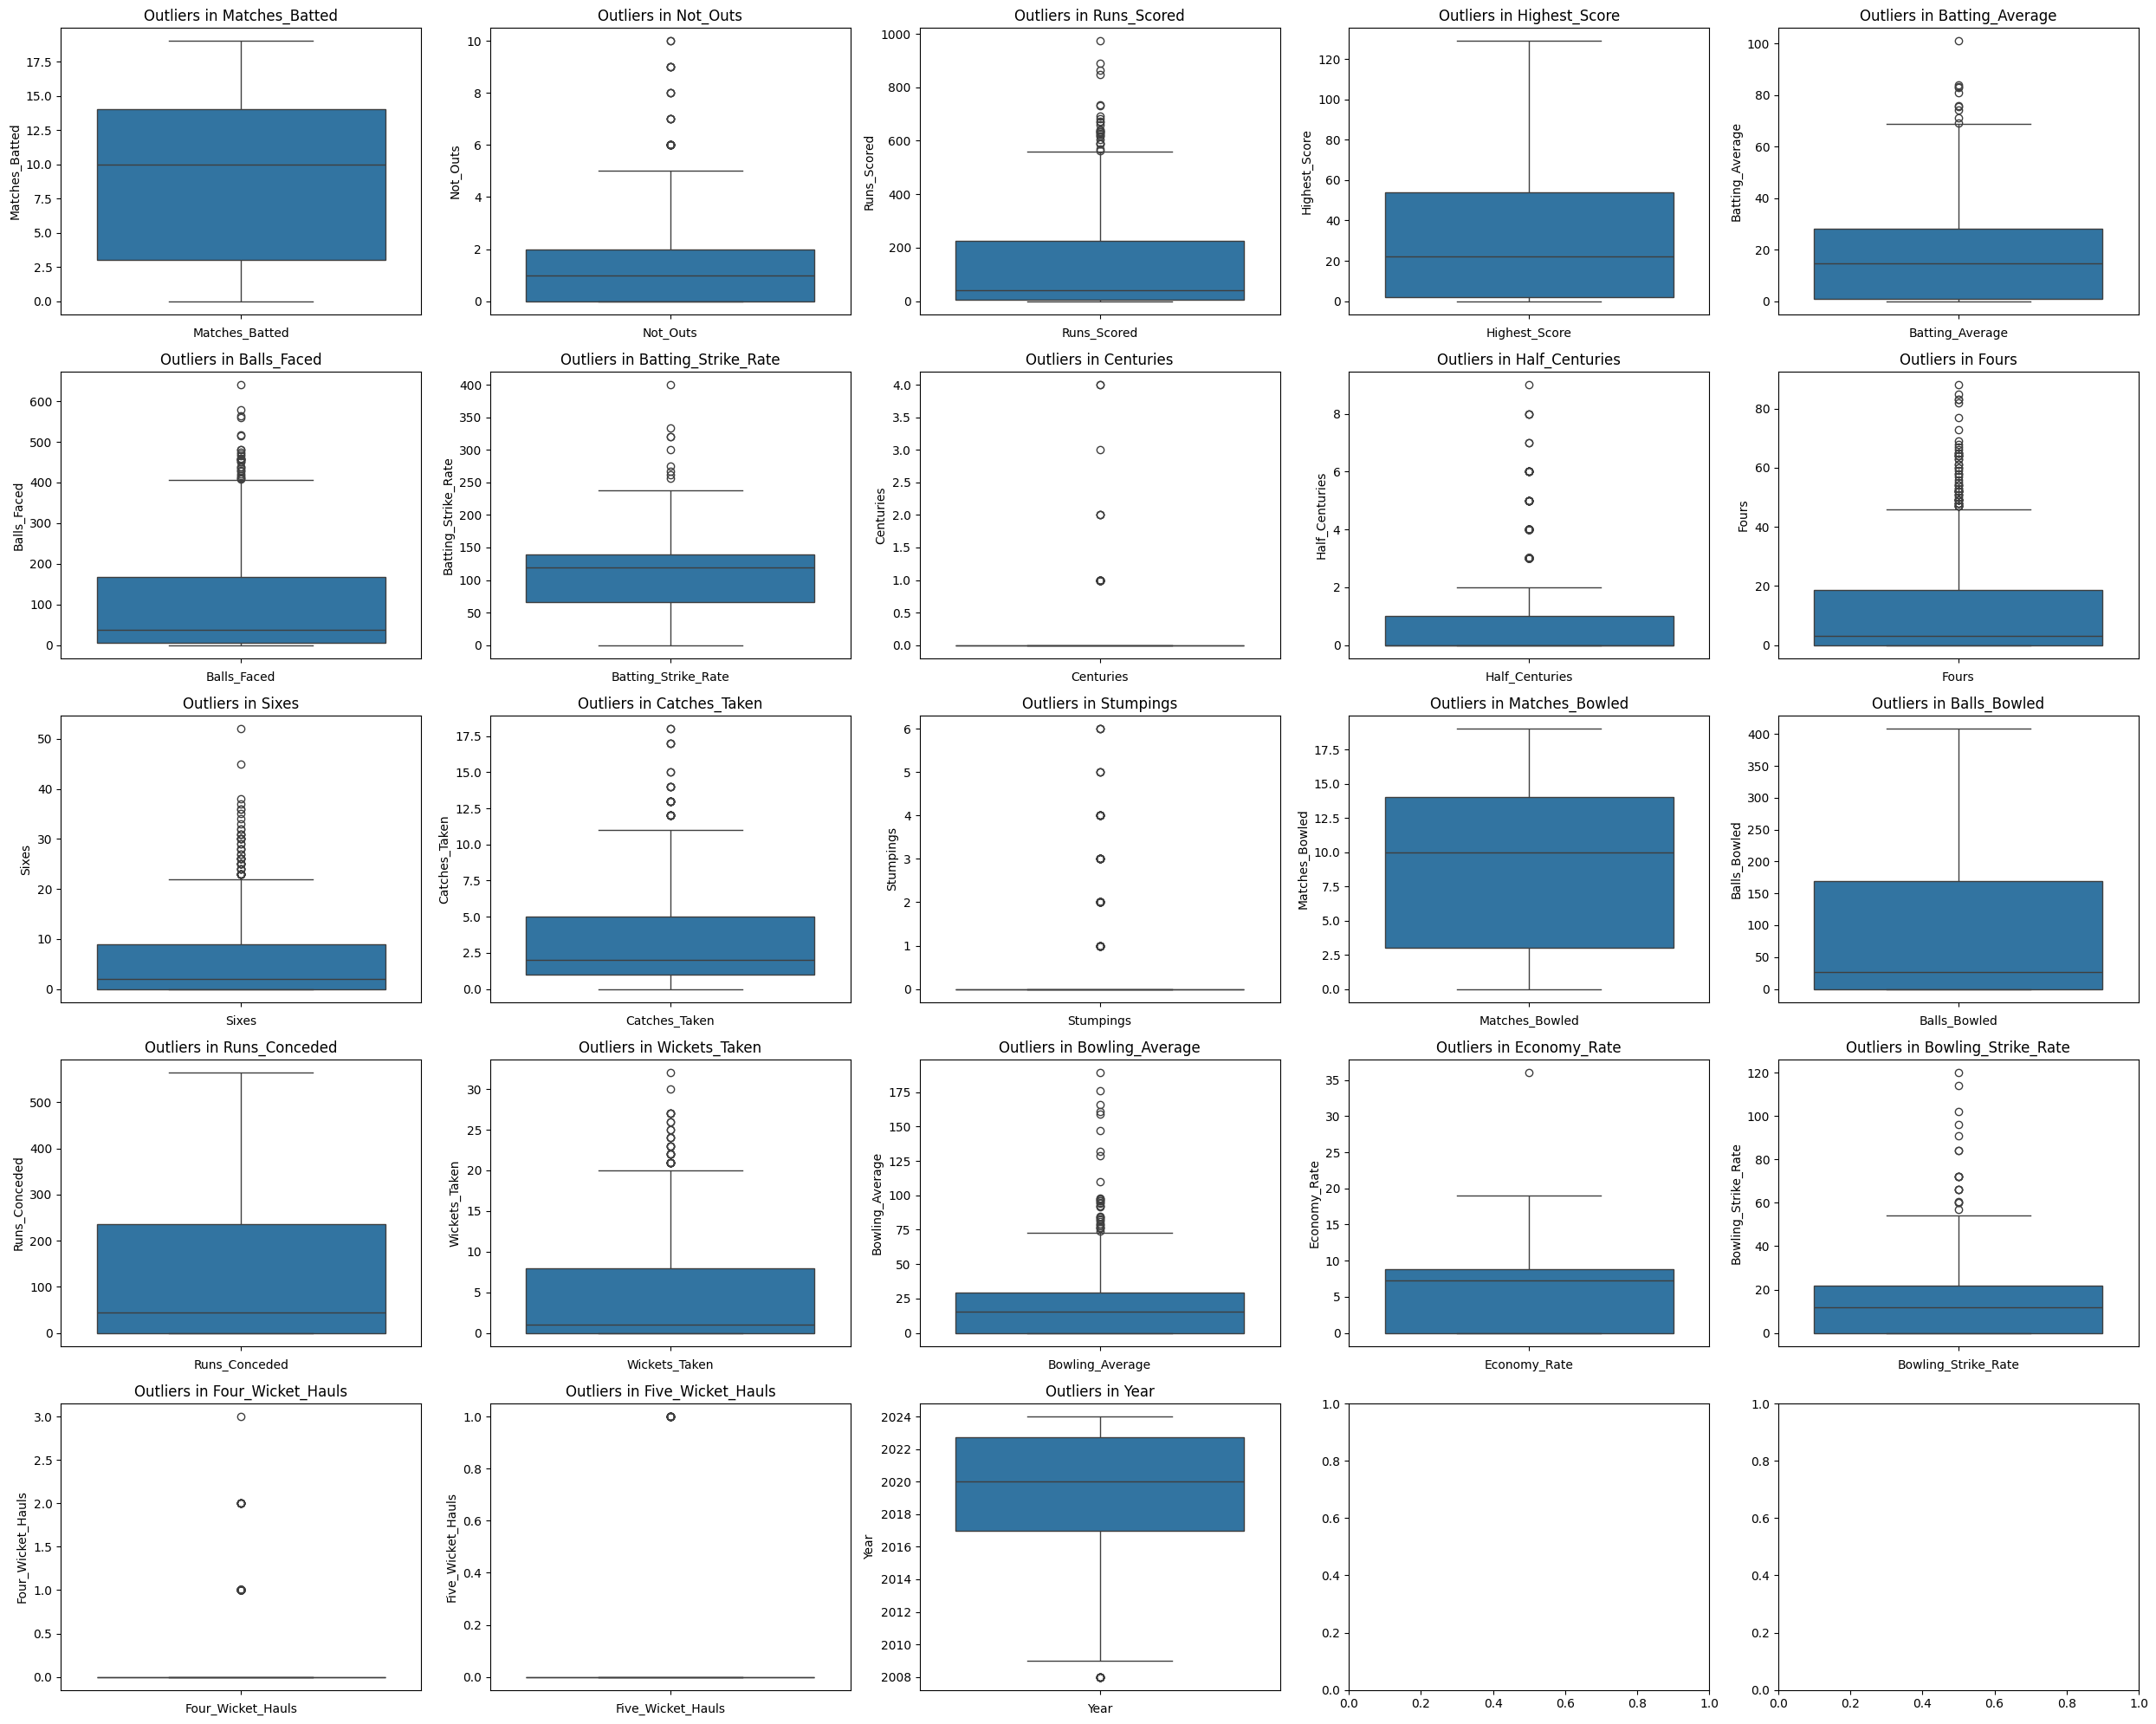

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns   
fig, axes = plt.subplots(5, 5, figsize=(25, 20))
axes = axes.flatten() 
for i, col in enumerate(cols_convrt):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Outliers in {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(col)

'ArithmeticError'
plt.tight_layout()
plt.show()

QUESTION 3 . Convert all numerical columns to appropriate data types for analysis.

In [62]:
for col in cols_convrt:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.dtypes


Year                   float64
Player_Name             object
Matches_Batted         float64
Not_Outs               float64
Runs_Scored            float64
Highest_Score          float64
Batting_Average        float64
Balls_Faced            float64
Batting_Strike_Rate    float64
Centuries              float64
Half_Centuries         float64
Fours                  float64
Sixes                  float64
Catches_Taken          float64
Stumpings              float64
Matches_Bowled         float64
Balls_Bowled           float64
Runs_Conceded          float64
Wickets_Taken          float64
Best_Bowling_Match      object
Bowling_Average        float64
Economy_Rate           float64
Bowling_Strike_Rate    float64
Four_Wicket_Hauls      float64
Five_Wicket_Hauls      float64
dtype: object

Question4: Normalize or standardize relevant numerical features.


In [11]:
data_zscore = data.copy()

for col in cols_convrt:
    mean = data[col].mean()
    std = data[col].std()
    data_zscore[col] = (data[col] - mean) / std
data_zscore

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
0,1.193831,Ruturaj Gaikwad,-1.267064,-0.875789,-0.415926,0.471207,0.790791,-0.387646,0.293491,-0.157583,...,-1.277983,-0.785095,-0.812747,-0.700786,0,-0.780151,-1.197630,-0.830655,-0.256527,-0.134172
1,0.943362,Ruturaj Gaikwad,1.263867,-0.286546,2.677087,1.955193,1.494918,2.457487,0.764313,-0.157583,...,1.260015,-0.785095,-0.812747,-0.700786,0,-0.780151,-1.197630,-0.830655,-0.256527,-0.134172
2,0.692892,Ruturaj Gaikwad,0.902306,-0.875789,1.379074,2.181017,0.536120,1.568893,0.409128,-0.157583,...,0.897444,-0.785095,-0.812747,-0.700786,0,-0.780151,-1.197630,-0.830655,-0.256527,-0.134172
3,0.442422,Ruturaj Gaikwad,1.263867,0.302697,2.940197,NaN,1.689097,2.995536,0.574566,3.555466,...,1.260015,-0.785095,-0.812747,-0.700786,0,-0.780151,-1.197630,-0.830655,-0.256527,-0.134172
4,0.191953,Ruturaj Gaikwad,-0.543941,0.302697,0.420181,1.309982,2.030877,0.574319,0.312060,-0.157583,...,-0.552841,-0.785095,-0.812747,-0.700786,0,-0.780151,-1.197630,-0.830655,-0.256527,-0.134172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,0.692892,Mayank Markande,-1.267064,-0.875789,-0.772588,-1.012780,-1.054214,-0.803411,-1.725691,-0.157583,...,-1.277983,-0.430333,-0.442174,-0.543634,1/26,1.614182,0.584226,1.842681,-0.256527,-0.134172
1168,0.442422,Mayank Markande,-1.447845,-0.875789,-0.772588,-1.012780,-1.054214,-0.803411,-1.725691,-0.157583,...,-1.459269,-0.633054,-0.643714,-0.700786,0/26,-0.780151,0.698055,-0.830655,-0.256527,-0.134172
1169,-0.058517,Mayank Markande,-1.086283,-0.286546,-0.737506,-0.819216,-0.691262,-0.762649,0.300075,-0.157583,...,-1.096697,-0.481013,-0.429171,-0.543634,1/23,1.698194,0.954169,1.460776,-0.256527,-0.134172
1170,-0.308986,Mayank Markande,0.902306,1.481183,-0.649803,NaN,-0.419048,-0.607757,-0.248570,-0.157583,...,0.897444,1.444834,1.579726,1.656491,4/23,0.250252,0.632385,0.289600,2.964312,-0.134172


 QUESTION 5. How would you handle data if there are duplicate records?

 To handle duplicate records in a dataset, we should first identify them and then removethem . 

Identifying and Removing Duplicates
1. Identify Duplicates
We can check duplicate data exist in your dataset. duplicated().sum() 
 
2. Removing Duplicates
Once we"ve identified the duplicates, we can remove them using the drop_duplicates() 

Exploratory Data Analysis (EDA)

QUESTION 1. What is the distribution of the Batting Average for all players?

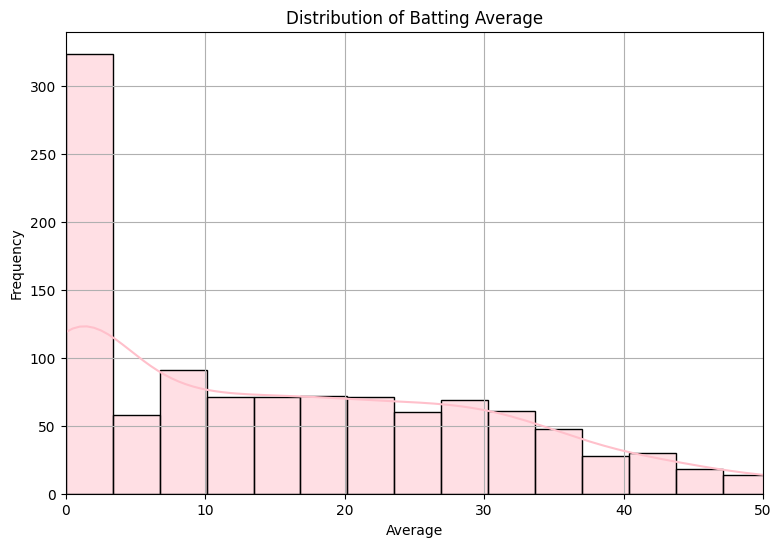

Plotted distribution of Batting Average.


In [13]:
plt.figure(figsize=(9, 6))
sns.histplot(data['Batting_Average'], bins=30, kde=True, color='pink')
plt.title('Distribution of Batting Average')
plt.xlabel('Average')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0,50)
plt.show()
print("Plotted distribution of Batting Average.")

 Question 2. 
 Which player has the highest Batting Strike Rate across all seasons?


In [14]:
highest_sr_player = data.loc[data['Batting_Strike_Rate'].idxmax()]
print(f"{highest_sr_player['Player_Name']} - Strike Rate: {highest_sr_player['Batting_Strike_Rate']}")

Prerak Mankad - Strike Rate: 400.0


Question 3. 
 What is the trend in Runs Scored for each player over different years?

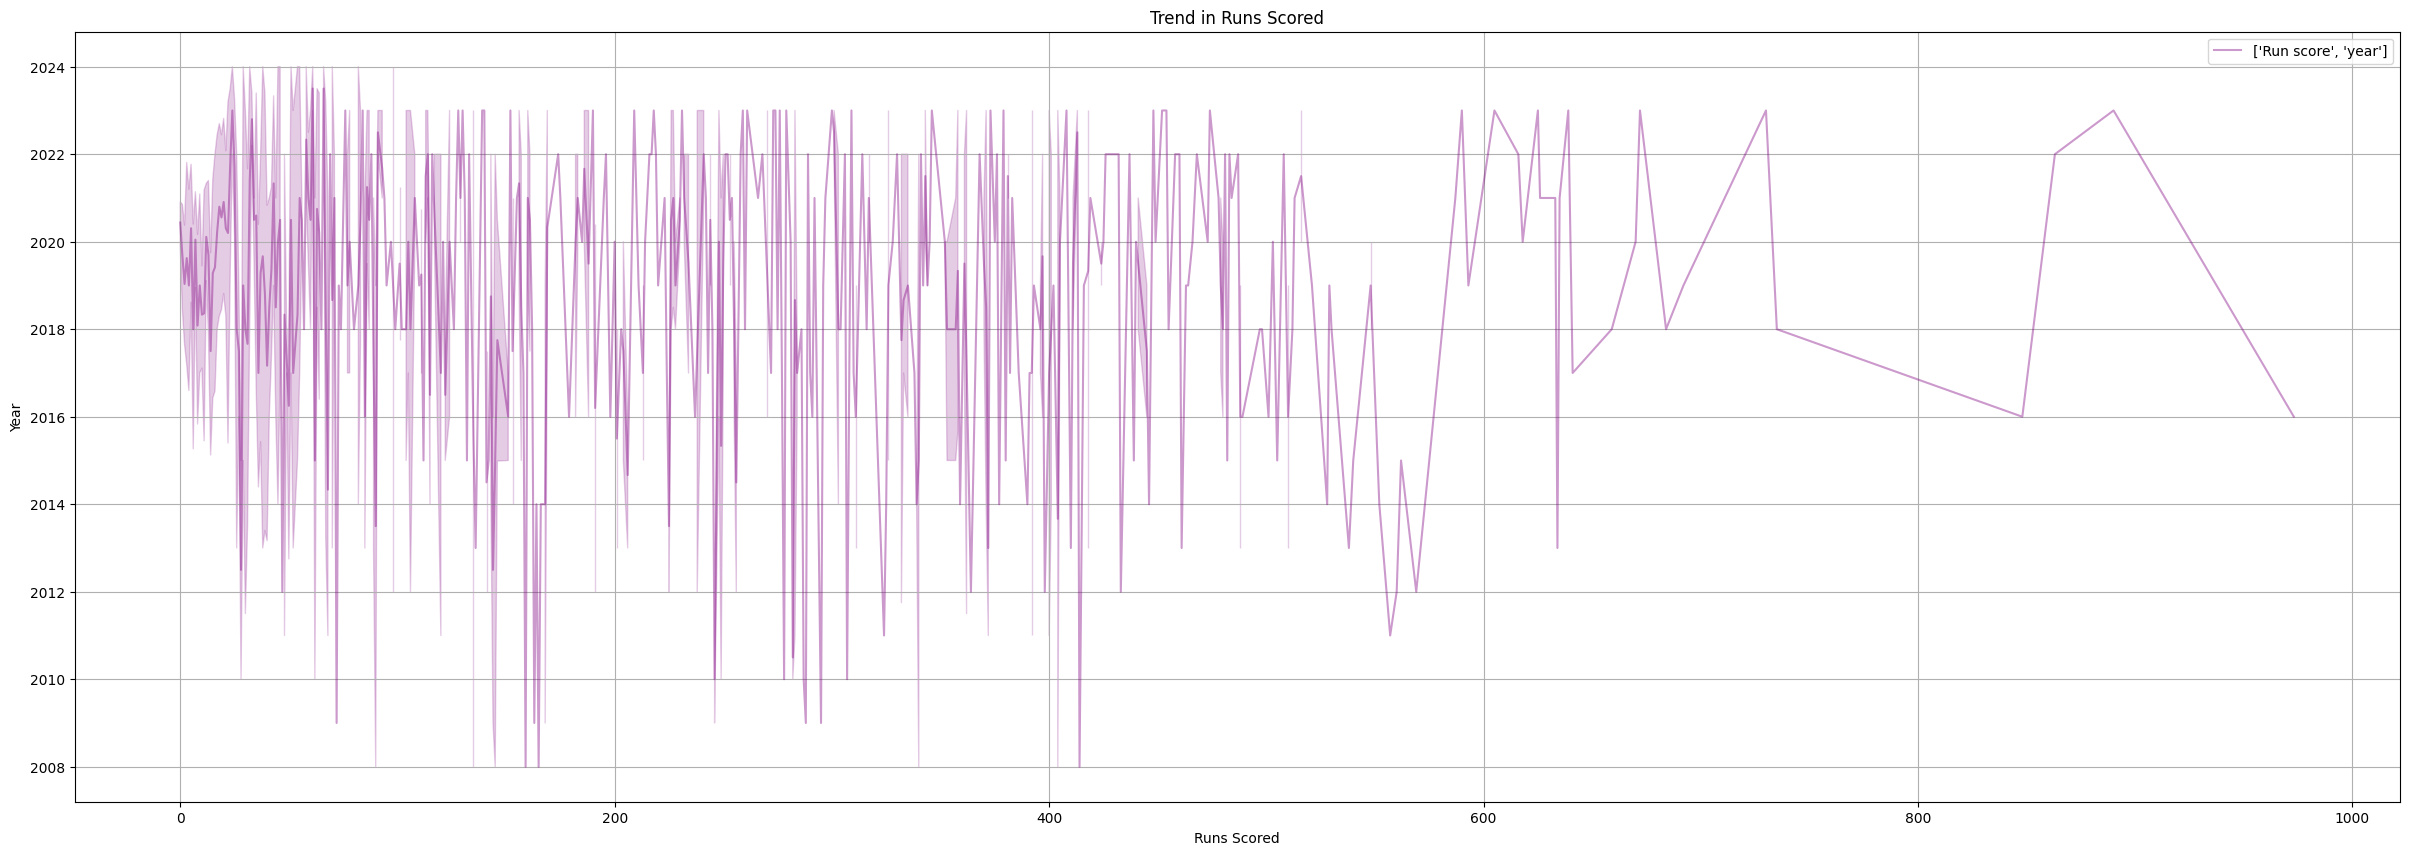

In [15]:

plt.figure(figsize=(30, 10))
sns.lineplot(x = data['Runs_Scored'], y= data['Year'], color="purple", alpha= 0.4, label = ['Run score', 'year'])
plt.title('Trend in Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Year')
plt.legend()
plt.grid(True)
plt.show()

 QUESTION 4. 
 Identify the top 3 players with the most Centuries.

In [16]:
top3 = data.groupby('Player_Name')['Centuries'].sum().sort_values(ascending=False).head(3)
print("Top 3 players with the most Centuries:")
print(top3)

Top 3 players with the most Centuries:
Player_Name
Virat Kohli    7.0
Jos Buttler    5.0
KL Rahul       4.0
Name: Centuries, dtype: float64


QUESTION 5. . Which player has the highest Bowling Economy Rate?

In [17]:
top3 = data.groupby('Player_Name')['Economy_Rate'].sum().sort_values(ascending=False).head(1)
top3 

Player_Name
Jaydev Unadkat    135.62
Name: Economy_Rate, dtype: float64


FEATURE ENGINERRING


QUESTION1. 
 Create a new feature called "Boundary Percentage", which calculates the 
percentage of runs scored from fours and sixes.

In [18]:
data['Boundary_Runs'] = (data['Fours']*4 + data['Sixes']*6)
data['Boundary_percentage'] = data['Boundary_Runs']/data['Runs_Scored']*100

data['Boundary_percentage'].head(10)

0    62.295082
1    61.694915
2    58.695652
3    62.047244
4    49.019608
5    61.904762
6    63.492063
7          NaN
8    69.230769
9    62.068966
Name: Boundary_percentage, dtype: float64

QUESTION 2. Create a feature called "Batting Impact Score" based on runs, strike rate, and 
average.


In [19]:
data['Impact_Score'] = (data_zscore['Runs_Scored']*0.4) + (data_zscore['Batting_Strike_Rate']*0.2)+(data_zscore['Batting_Average']*0.9)
data['Impact_Score'].head(10)

0    0.604040
1    2.569123
2    1.115963
3    2.811179
4    2.058273
5    3.254529
6    1.764787
7   -1.602966
8    0.671813
9    1.160493
Name: Impact_Score, dtype: float64

QUESTION 3.. Generate a metric to evaluate a player's all-round performance considering both 
batting and bowling stat

In [20]:
data['all_round_metric'] = 0.5*(data_zscore['Runs_Scored']+data_zscore['Batting_Average']+data_zscore['Batting_Strike_Rate']) + 0.5*(-1*data_zscore['Bowling_Average']+(-1*data_zscore['Bowling_Strike_Rate'])+data_zscore['Wickets_Taken'] + data_zscore['Five_Wicket_Hauls']+data_zscore['Four_Wicket_Hauls'])

data[data['Player_Name'] == 'Rinku Singh']

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,Boundary_Runs,Boundary_percentage,Impact_Score,all_round_metric
369,2024.0,Rinku Singh,1.0,0.0,23.0,23.0,23.00,15.0,153.33,0.0,...,0,0.0,0.0,0.0,0.0,0.0,12.0,52.173913,0.220694,0.540523
370,2023.0,Rinku Singh,14.0,6.0,474.0,NaN,59.25,317.0,149.53,0.0,...,0,0.0,0.0,0.0,0.0,0.0,298.0,62.869198,3.236196,2.923342
371,2022.0,Rinku Singh,7.0,2.0,174.0,NaN,34.80,117.0,148.72,0.0,...,0,0.0,0.0,0.0,0.0,0.0,110.0,63.218391,1.200707,1.299955
372,2020.0,Rinku Singh,1.0,0.0,11.0,11.0,11.00,11.0,100.00,0.0,...,0,0.0,0.0,0.0,0.0,0.0,4.0,36.363636,-0.640741,-0.307653
373,2019.0,Rinku Singh,5.0,1.0,37.0,30.0,18.50,34.0,108.82,0.0,...,0,0.0,0.0,0.0,0.0,0.0,16.0,43.243243,-0.141834,0.069649
374,2018.0,Rinku Singh,4.0,0.0,29.0,16.0,7.25,31.0,93.54,0.0,...,0,0.0,0.0,0.0,0.0,0.0,16.0,55.172414,-0.824615,-0.422980


QUESTION 4. Categorize players into Aggressive, Balanced, and Defensive based on their strike 
rate.


In [27]:
data_zscore['Batting_Strike_Rate'] = pd.to_numeric(data_zscore['Batting_Strike_Rate'], errors='coerce')

data_zscore.loc[data_zscore['Batting_Strike_Rate'] >= 1, 'Play_Style'] = 'Aggressive'
data_zscore.loc[data_zscore['Batting_Strike_Rate'] <= -1, 'Play_Style'] = 'Defensive'
data_zscore.loc[
    (data_zscore['Batting_Strike_Rate'] > -1) & (data_zscore['Batting_Strike_Rate'] < 1),
    'Play_Style'
] = 'Balanced'

print(data_zscore[['Player_Name', 'Batting_Strike_Rate', 'Play_Style']])

                 Player_Name  Batting_Strike_Rate Play_Style
0            Ruturaj Gaikwad             0.293491   Balanced
1            Ruturaj Gaikwad             0.764313   Balanced
2            Ruturaj Gaikwad             0.409128   Balanced
3            Ruturaj Gaikwad             0.574566   Balanced
4            Ruturaj Gaikwad             0.312060   Balanced
...                      ...                  ...        ...
1167         Mayank Markande            -1.725691  Defensive
1168         Mayank Markande            -1.725691  Defensive
1169         Mayank Markande             0.300075   Balanced
1170         Mayank Markande            -0.248570   Balanced
1171  Jhathavedh Subramanyan                  NaN        NaN

[1172 rows x 3 columns]


QUESTION 5.  Compute the year-over-year growth in performance metrics for each player.

In [29]:
#Bowling
data_x = data.sort_values(by=['Player_Name', 'Year'])

data_x['Wickets_Taken_Growth (%)'] = data_x.groupby('Player_Name')['Wickets_Taken'].pct_change() * 100
data_x['Bowling_Average_Growth (%)'] = data_x.groupby('Player_Name')['Bowling_Average'].pct_change() * 100
data_x['Bowling_Economy_Growth (%)'] = data_x.groupby('Player_Name')['Economy_Rate'].pct_change() * 100


#For Batting
data_b = data.sort_values(by=['Player_Name', 'Year'],  ascending= True)
data_b['Runs_Scored_Growth (%)'] = data_b.groupby('Player_Name')['Runs_Scored'].pct_change() * 100
data_b['Batting_Average_Growth (%)'] = data_b.groupby('Player_Name')['Batting_Average'].pct_change() * 100
data_b['Strike_Rate_Growth (%)'] = data_b.groupby('Player_Name')['Batting_Strike_Rate'].pct_change() * 100

data5[['Player_Name','Runs_Scored_Growth (%)', 'Batting_Average_Growth (%)', 'Strike_Rate_Growth (%)']].tail(10)

C:\Users\91965\AppData\Local\Temp\ipykernel_13692\29410566.py:4: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_x['Wickets_Taken_Growth (%)'] = data_x.groupby('Player_Name')['Wickets_Taken'].pct_change() * 100
C:\Users\91965\AppData\Local\Temp\ipykernel_13692\29410566.py:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_x['Bowling_Average_Growth (%)'] = data_x.groupby('Player_Name')['Bowling_Average'].pct_change() * 100
C:\Users\91965\AppData\Local\Temp\ipykernel_13692\29410566.py:6: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecate

,Player_Name,Runs_Scored_Growth (%),Batting_Average_Growth (%),Strike_Rate_Growth (%)
916,Yuzvendra Chahal,0.000000,NaN,0.000000
915,Yuzvendra Chahal,-100.000000,NaN,-100.000000
914,Yuzvendra Chahal,inf,inf,inf
913,Yuzvendra Chahal,-100.000000,-100.000000,-100.000000
912,Yuzvendra Chahal,inf,inf,inf
911,Yuzvendra Chahal,-83.333333,-66.666667,-11.120000
910,Yuzvendra Chahal,900.000000,-100.000000,11.101110
909,Yuzvendra Chahal,-50.000000,inf,68.782069
908,Yuzvendra Chahal,-100.000000,-100.000000,-100.000000
907,Yuzvendra Chahal,NaN,NaN,NaN


Visualization & Insights


QUESTION 1. Create a bar chart to show the Runs Scored vs. Balls Faced for all players.

C:\Users\91965\AppData\Local\Temp\ipykernel_13692\3578347001.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby('Balls_Played_Bin')['Runs_Scored'].mean().reset_index()


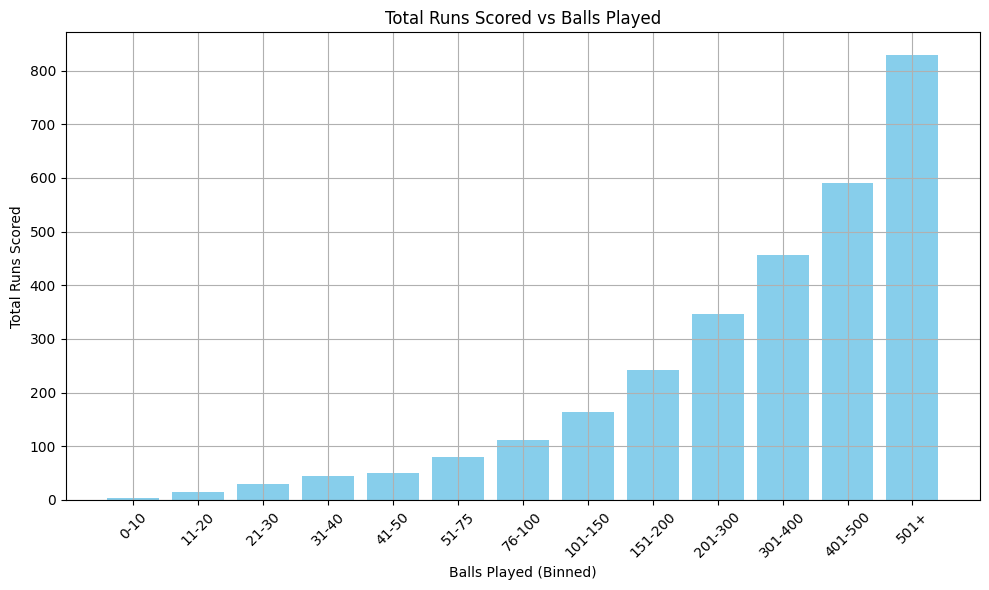

In [63]:
bins = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 300, 400, 500, 700]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-75', '76-100', '101-150', '151-200', '201-300', '301-400', '401-500', '501+']
data['Balls_Played_Bin'] = pd.cut(data['Balls_Faced'], bins=bins, labels=labels, right=True)
grouped_data = data.groupby('Balls_Played_Bin')['Runs_Scored'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Balls_Played_Bin'], grouped_data['Runs_Scored'], color='skyblue')
plt.xlabel('Balls Played (Binned)')
plt.ylabel('Total Runs Scored')
plt.title('Total Runs Scored vs Balls Played')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


QUESTION 2. Generate a heatmap showing the correlation between different numerical features.

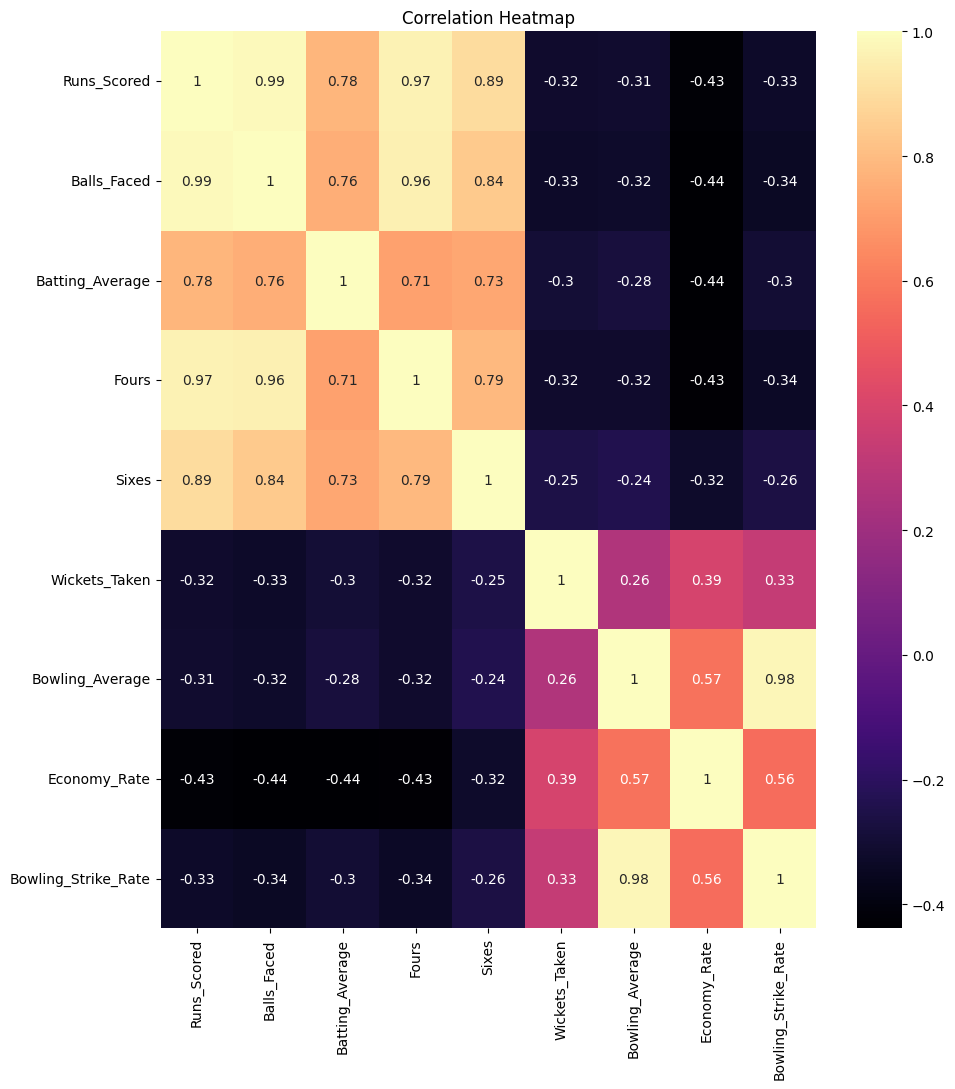

In [57]:

numeric = data[['Runs_Scored', 'Balls_Faced', 'Batting_Average', 'Fours', 'Sixes', 'Wickets_Taken', 'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate']]
corr = numeric.corr()
plt.figure(figsize=(10,11))
sns.heatmap(corr, annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()



QUESTION 3. Plot a trend line showing the performance of a single player over multiple years.

Text(0.5, 1.0, 'Rinku Singh - Runs Over Years')

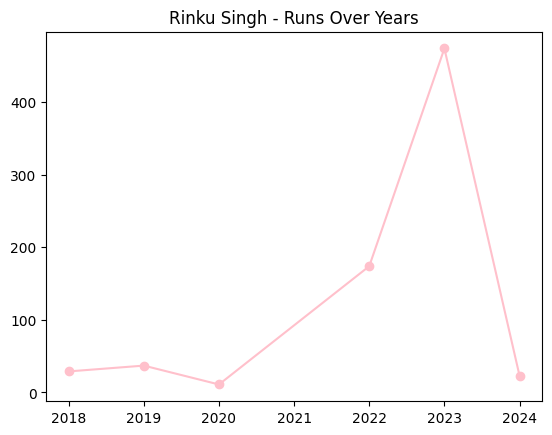

In [23]:
rinku_data = data[data['Player_Name'] == 'Rinku Singh']

plt.plot(rinku_data['Year'], rinku_data['Runs_Scored'], marker='o', color= 'pink')

plt.title("Rinku Singh - Runs Over Years")

QUESTION 4.Create a pie chart for the distribution of centuries and half-centuries across all 
players.


([<matplotlib.patches.Wedge at 0x181bf06ac50>,
 [Text(1.0838526309710235, 0.18778571387938559, 'Centuries'),
  Text(-1.0838526117560434, -0.18778582478345746, 'Half Centuries')],
 [Text(0.5911923441660127, 0.10242857120693757, '5.5%'),
  Text(-0.5911923336851146, -0.1024286317000677, '94.5%')])

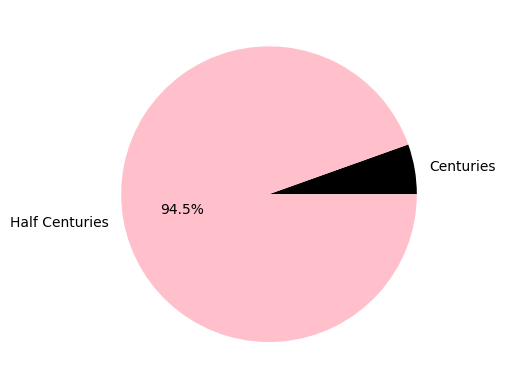

In [52]:
total_centuries = data['Centuries'].sum()
total_half = data['Half_Centuries'].sum()
plt.pie([total_centuries, total_half], labels=['Centuries', 'Half Centuries'], autopct='%1.1f%%', colors = ['black','pink'])

 QUESTION 5.Develop a visualization to compare Bowling Average vs. Bowling Strike Rate

Text(0.5, 1.0, 'Bowling Avg vs Bowling Strike Rate')

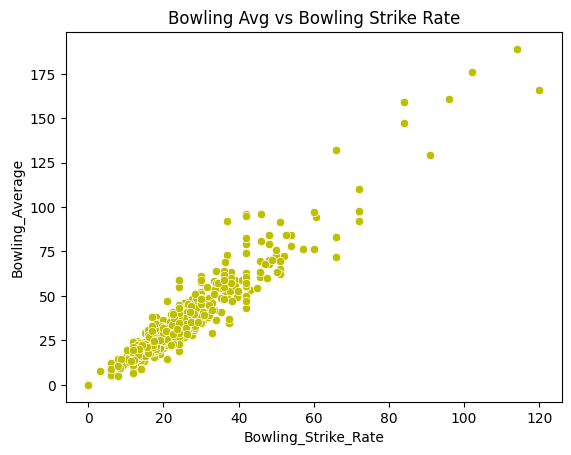

In [51]:
sns.scatterplot(x='Bowling_Strike_Rate', y='Bowling_Average', data=data, color= 'y')
plt.title("Bowling Avg vs Bowling Strike Rate")

Python-Based Queries

 QUESTION 1. Write a Python query to get the top 5 players with the highest Batting Average.

In [46]:
top5_batting = data[data['Matches_Batted'] > 0].sort_values(by='Batting_Average', ascending=False).head(5)
print(top5_batting[['Player_Name', 'Batting_Average']])


        Player_Name  Batting_Average
509    Deepak Hooda           101.00
405   Manish Pandey            84.00
12         MS Dhoni            83.20
1040     Tom Curran            83.00
946     Virat Kohli            81.08


QUESTION 2.
 Write a Python query to find out which player has played the most matches.

In [32]:
mostmatches = data.groupby('Player_Name')['Matches_Batted'].sum().idxmax()
print(mostmatches)


MS Dhoni


QUESTION 3. Retrieve all players who have scored more than 500 runs in a season.

In [36]:
_500runs = data[data['Runs_Scored'] > 500][['Player_Name', 'Year', 'Runs_Scored']]
print(_500runs)


          Player_Name    Year  Runs_Scored
1     Ruturaj Gaikwad  2023.0        590.0
3     Ruturaj Gaikwad  2021.0        635.0
5        Devon Conway  2023.0        672.0
33     Ajinkya Rahane  2015.0        540.0
36     Ajinkya Rahane  2012.0        560.0
121      Rishabh Pant  2018.0        684.0
125      David Warner  2023.0        516.0
128      David Warner  2020.0        548.0
129      David Warner  2019.0        692.0
130      David Warner  2017.0        641.0
131      David Warner  2016.0        848.0
132      David Warner  2015.0        562.0
133      David Warner  2014.0        528.0
223      Shubman Gill  2023.0        890.0
268   Kane Williamson  2018.0        735.0
363      Shreyas Iyer  2020.0        519.0
418     Andre Russell  2019.0        510.0
469          KL Rahul  2022.0        616.0
470          KL Rahul  2021.0        626.0
471          KL Rahul  2020.0        670.0
472          KL Rahul  2019.0        593.0
473          KL Rahul  2018.0        659.0
485   Quint

QUESTION 4. Identify players who have taken at least one five-wicket haul.

In [38]:
five_wicket = data[data['Five_Wicket_Hauls'] >= 1]['Player_Name'].unique()
print(five_wicket)


['Ravindra Jadeja' 'Ishant Sharma' 'Mohit Sharma' 'Andre Russell'
 'Sunil Narine' 'Varun Chakaravarthy' 'Amit Mishra' 'Jasprit Bumrah'
 'Akash Madhwal' 'Arshdeep Singh' 'Harshal Patel' 'Yuzvendra Chahal'
 'Adam Zampa' 'Alzarri Joseph' 'Wanindu Hasaranga' 'Bhuvneshwar Kumar'
 'Jaydev Unadkat' 'Umran Malik']


QUESTION 5. . Write a query to calculate the total number of boundaries hit by each player.

In [ ]:
data['Total_Boundaries'] = data['Fours'] + data['Sixes']
boundaries = data.groupby('Player_Name')['Total_Boundaries'].sum().sort_values(ascending=False)
print(boundarie-s---)


Player_Name
Shikhar Dhawan      908.0
Virat Kohli         891.0
David Warner        877.0
Rohit Sharma        819.0
Dinesh Karthik      588.0
                    ...  
Will Jacks            0.0
Yash Dayal            0.0
Yash Thakur           0.0
Yudhvir Singh         0.0
Yuzvendra Chahal      0.0
Name: Total_Boundaries, Length: 247, dtype: float64
